In [1]:
module qt
    include("QuantumTrajectories.jl")
end

macro show(matrix)
   :(show(stdout, "text/plain", $(matrix))) 
end

@show (macro with 1 method)

In [2]:
using LinearAlgebra
using Plots
using LaTeXStrings

In [3]:
# Hamiltonian parameters
t1 = 1.0
t2 = 0.5
V = 1.5

# The thermal bath parameters
temperature = 0.2
γ = 0.5

# The measured observable is position.
# The angle ϕ can be set to any number in this case.
θ = 0.0
ϕ = π/2
taum = 20.0

# The simulation paramters
dt = 0.01
T=14800
N=4

ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)
U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
θmat[1:2, 1:2] = block
θ = qt.observable([θmat], (1.0, ), qt.make)
n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, x, J, λ, transform=false)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  147.91, 147.92, 147.93, 147.94, 147.95, 147.96, 147.97, 147.98, 147.99, 148.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.03650758780454595, -0.03603585295337311, -0.035543474686379625, -0.035030872119808286, -0.03449847890672176, -0.03394674285409627, -0.033376125527736805, -0.03278710184539585, -0.03218015965848887, -0.03155579932281051])

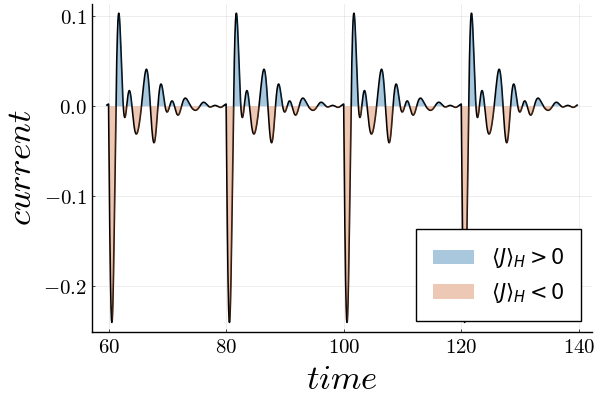

findfont: Font family ['cm'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cm'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cm'] not found. Falling back to DejaVu Sans.


In [4]:
poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]
start = 5960
final = 820

plot(ts[start:end-final], cur[start:end-final], linewidth=1.2, label=false, color="black", xlabelfontsize=25, ylabelfontsize=25,
    xtickfontsize=15, ytickfontsize=15, legend=:bottomright, legendfontsize=15, fontfamily="cm")
plot!(ts[start:end-final], poscur[start:end-final], fillrange =  zeros(Float64, length(cur)),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label = L"\langle J\rangle_H > 0")
plot!(ts[start:end-final], negcur[start:end-final], fillrange =  zeros(Float64, length(cur)),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label = L"\langle J\rangle_H<0")
xlabel!(L"time")
ylabel!(L"current")

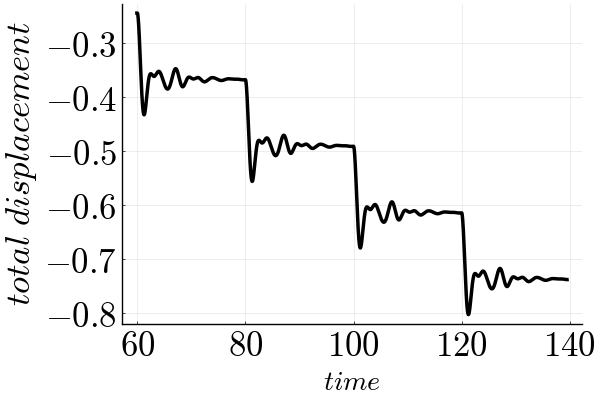

findfont: Font family ['cm'] not found. Falling back to DejaVu Sans.


In [5]:
# The integrated current represents the accumulated displacement of the particle
curint = [sum(cur[1:i])*dt for i in eachindex(cur)]
poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]
start = 5960
final = 820

plot(ts[start:end-final], curint[start:end-final], linewidth=2.5, label=false, color="black", xlabelfontsize=20, ylabelfontsize=25,
    xtickfontsize=25, ytickfontsize=25, legend=:bottomright, legendfontsize=10, fontfamily="cm")
xlabel!(L"time")
ylabel!(L"total\ displacement")

In [6]:
Plots.savefig("images/dynamics_example2_total_displacement.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example2_total_displacement.png"

In [7]:
# Hamiltonian parameters
t1 = 1.0
t2 = 0.5
V = 1.5

# The thermal bath parameters
temperature = 0.2
γ = 0.05

# The measured observable
# Time between measurements is short in this case, meaning
# that we are approaching the Zeno limit.
θ = 0.0
ϕ = π/2
taum = 0.25

# The simulation paramters
dt = 0.01
T=8000
N=4

ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)
U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
θmat[1:2, 1:2] = block
θ = qt.observable([θmat], (1.0, ), qt.make)
n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, x, J, λ, transform=false)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  79.91, 79.92, 79.93, 79.94, 79.95, 79.96, 79.97, 79.98, 79.99, 80.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.0054628225754933275, -0.005758065996824185, -0.006049017094146292, -0.0063354714472243405, -0.006617228455891164, -0.0068940915028002075, -0.0071658681124828335, -0.0074323701065686166, 6.440773277408778e-20, -0.00033408730602714145])

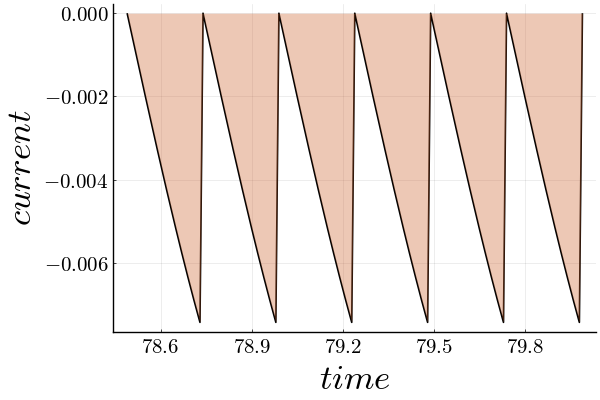

In [8]:
poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]

start = 7850
final=1

plot(ts[start:end-final], cur[start:end-final], linewidth=1.2, label=false, color="black", xlabelfontsize=25, ylabelfontsize=25,
    xtickfontsize=15, ytickfontsize=15, legend=:bottomright, legendfontsize=10, fontfamily="cm")

plot!(ts[start:end-final], negcur[start:end-final], fillrange =  zeros(Float64, length(cur)),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)
xlabel!(L"time")
ylabel!(L"current")

In [9]:
Plots.savefig("images/dynamics_example2_zeno.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example2_zeno.png"